<a href="https://colab.research.google.com/github/DanaPing/Portfolio/blob/main/asx_stock_returns_steps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook we will:

* Download prices
* Calculate Returns
* Calculate mean and standard deviation of returns

Lets load the modules first.


In [ ]:
!pip install pandas-datareader


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr

Work around as Yahoo FInance made a change causing error with Pandas Datareader 


In [ ]:
!pip install yfinance
import yfinance as yfin
yfin.pdr_override()

## Step 1: Specify date range for analysis 

Here we begin by creating start and end dates using pythons datetime module. 

In [ ]:
help(pdr.get_data_yahoo)

Help on function download in module yfinance.multi:

download(tickers, start=None, end=None, actions=False, threads=True, group_by='column', auto_adjust=False, back_adjust=False, progress=True, period='max', show_errors=True, interval='1d', prepost=False, proxy=None, rounding=False, **kwargs)
    Download yahoo tickers
    :Parameters:
        tickers : str, list
            List of tickers to download
        period : str
            Valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
            Either Use period parameter or use start and end
        interval : str
            Valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
            Intraday data cannot extend last 60 days
        start: str
            Download start date string (YYYY-MM-DD) or _datetime.
            Default is 1900-01-01
        end: str
            Download end date string (YYYY-MM-DD) or _datetime.
            Default is now
        group_by : str
            Group by 'ticker' or 'column' (de

In [ ]:
start = "2009-01-01"
end = "2020-09-15"

## Step 2: Select the stocks/tickers you would like to analyse

For Australian stocks, yahoo tickers require '.AX' to be specified at the end of the ticker symbol.  For other tickers use the search bar in yahoo finance.

In [ ]:
tickets = ['NAB.AX', 'WBC.AX', 'CBA.AX']

# Step 3: call the Pandas_Datareader DataReader module

In [ ]:
df = pdr.get_data_yahoo(tickets, start, end)

[*********************100%***********************]  3 of 3 completed


In [ ]:
df.index, df.columns, df.head()

(DatetimeIndex(['2009-01-02', '2009-01-05', '2009-01-06', '2009-01-07',
                '2009-01-08', '2009-01-09', '2009-01-12', '2009-01-13',
                '2009-01-14', '2009-01-15',
                ...
                '2020-09-02', '2020-09-03', '2020-09-04', '2020-09-07',
                '2020-09-08', '2020-09-09', '2020-09-10', '2020-09-11',
                '2020-09-14', '2020-09-15'],
               dtype='datetime64[ns]', name='Date', length=2960, freq=None),
 MultiIndex([('Adj Close', 'CBA.AX'),
             ('Adj Close', 'NAB.AX'),
             ('Adj Close', 'WBC.AX'),
             (    'Close', 'CBA.AX'),
             (    'Close', 'NAB.AX'),
             (    'Close', 'WBC.AX'),
             (     'High', 'CBA.AX'),
             (     'High', 'NAB.AX'),
             (     'High', 'WBC.AX'),
             (      'Low', 'CBA.AX'),
             (      'Low', 'NAB.AX'),
             (      'Low', 'WBC.AX'),
             (     'Open', 'CBA.AX'),
             (     'Open', 'NAB.

## Step 4: Understanding the pandas dataframe structure

A good way to quickly understand how a pandas dataframe is structured is to look at the index and the columns.

## Step 5: Access useful attributes easily

We are interested in the closing price information for all of these stocks.

In [ ]:
Close = df.Close
Close

,CBA.AX,NAB.AX,WBC.AX
Date,,,
2009-01-02,29.042646,19.406162,16.646669
2009-01-05,28.445881,19.244446,16.527479
2009-01-06,29.311192,19.729599,16.914843
2009-01-07,28.793995,19.872292,16.755924
2009-01-08,28.406096,19.843754,16.457954
...,...,...,...
2020-09-09,66.790001,17.440001,17.070000
2020-09-10,66.720001,17.320000,17.000000
2020-09-11,65.800003,17.150000,16.809999


## Step 6: Gain insights quickly with pandas describe method


In [ ]:
Close.describe(percentiles=[.1,.5,.9])

,CBA.AX,NAB.AX,WBC.AX
count,2958.000000,2958.000000,2958.000000
mean,67.076213,26.782174,27.205432
std,14.679221,4.443613,5.314568
min,23.940290,13.880000,14.100000
10%,48.678260,21.436200,20.037583
50%,72.209999,26.850000,27.979757
90%,82.452003,32.582266,33.521782
max,95.800949,37.642250,39.620266


## Step 7: Plot and save

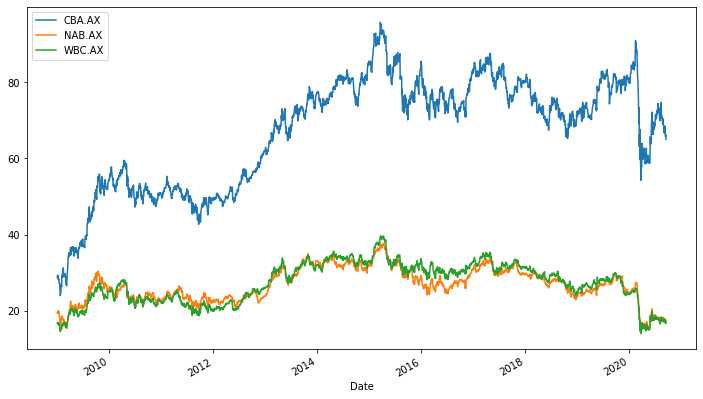

In [ ]:
Close.plot(figsize=(12,7))
plt.savefig('aussie_banks.pdf')